### Using SVM to classify iris and plotting the predictions 

In [40]:
from sklearn import svm, datasets
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [44]:
# for plotting convenience, we use only 2 features
iris = datasets.load_iris()
x = iris.data[:, :2]
y = iris.target

In [42]:
# we first optimize the hyperparameter values using GridSearchCV()
clf = svm.SVC()
grid = {'C': [1e2,1e3, 5e3, 1e4, 5e4, 1e5],
       'gamma': [1e-3, 5e-4, 1e-4, 5e-3],
       'kernel': ['rbf','linear','sigmoid']}
hyper_p = GridSearchCV(clf, grid)
hyper_p.fit(x, y)
hyper_p.best_estimator_

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

61600
(61600, 2)


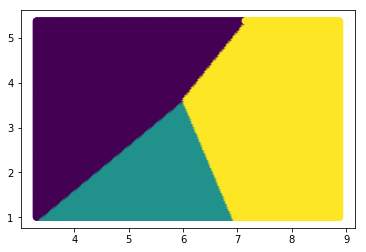

In [43]:
def makegrid(x1, x2, h=0.02):
    x1_min, x1_max = x1.min()-1, x1.max()+1
    x2_min, x2_max = x2.min()-1, x2.max()+1
    a = np.arange(x1_min, x1_max, h)
    b = np.arange(x2_min, x2_max, h)
    print(len(a)*len(b))
    xx, yy = np.meshgrid(a,b)
    return xx, yy
xx, yy = makegrid(x[:,0], x[:,1])
vrb = np.c_[xx.ravel(), yy.ravel()]
print(vrb.shape)
predictions = hyper_p.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c=predictions)
plt.show()

### EXPLANATION 
> - **np.arange(min, max, gap)** returns an array of discrete values in interval closed at min and open at max separated by gap
<br>
> - **np.meshgrid()**:
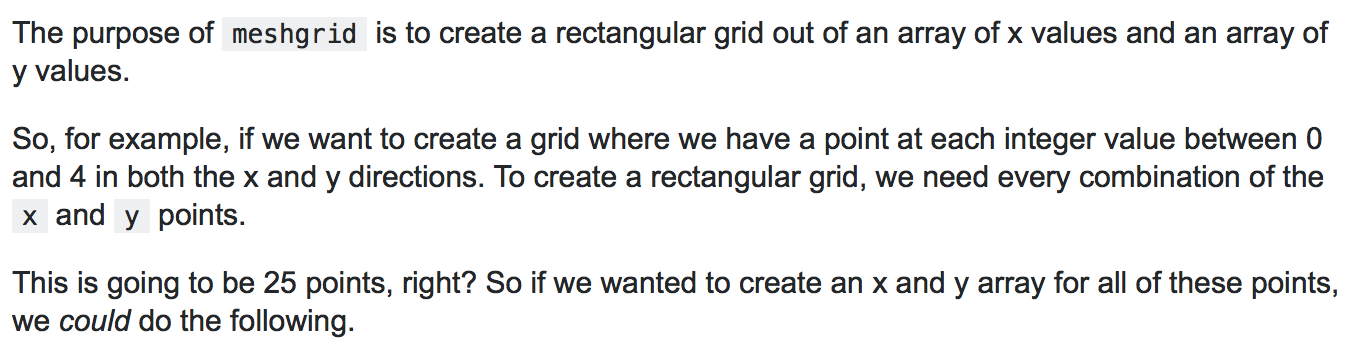
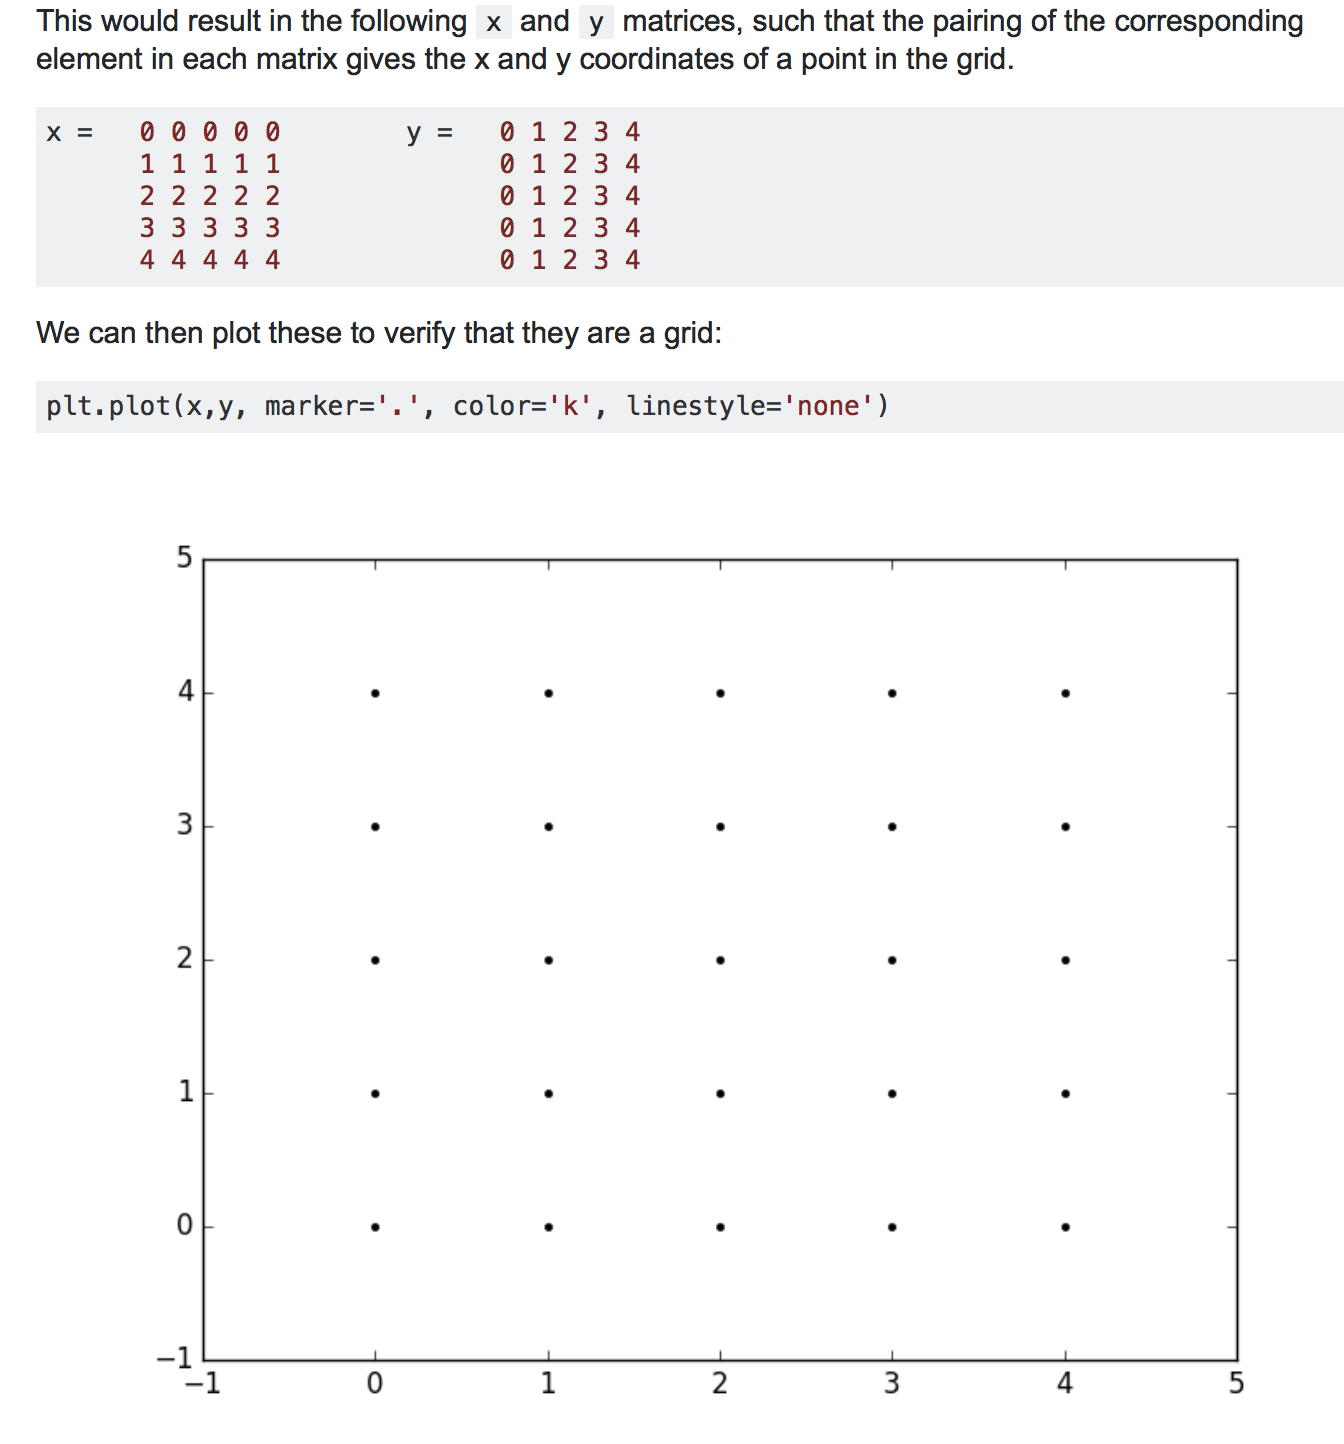
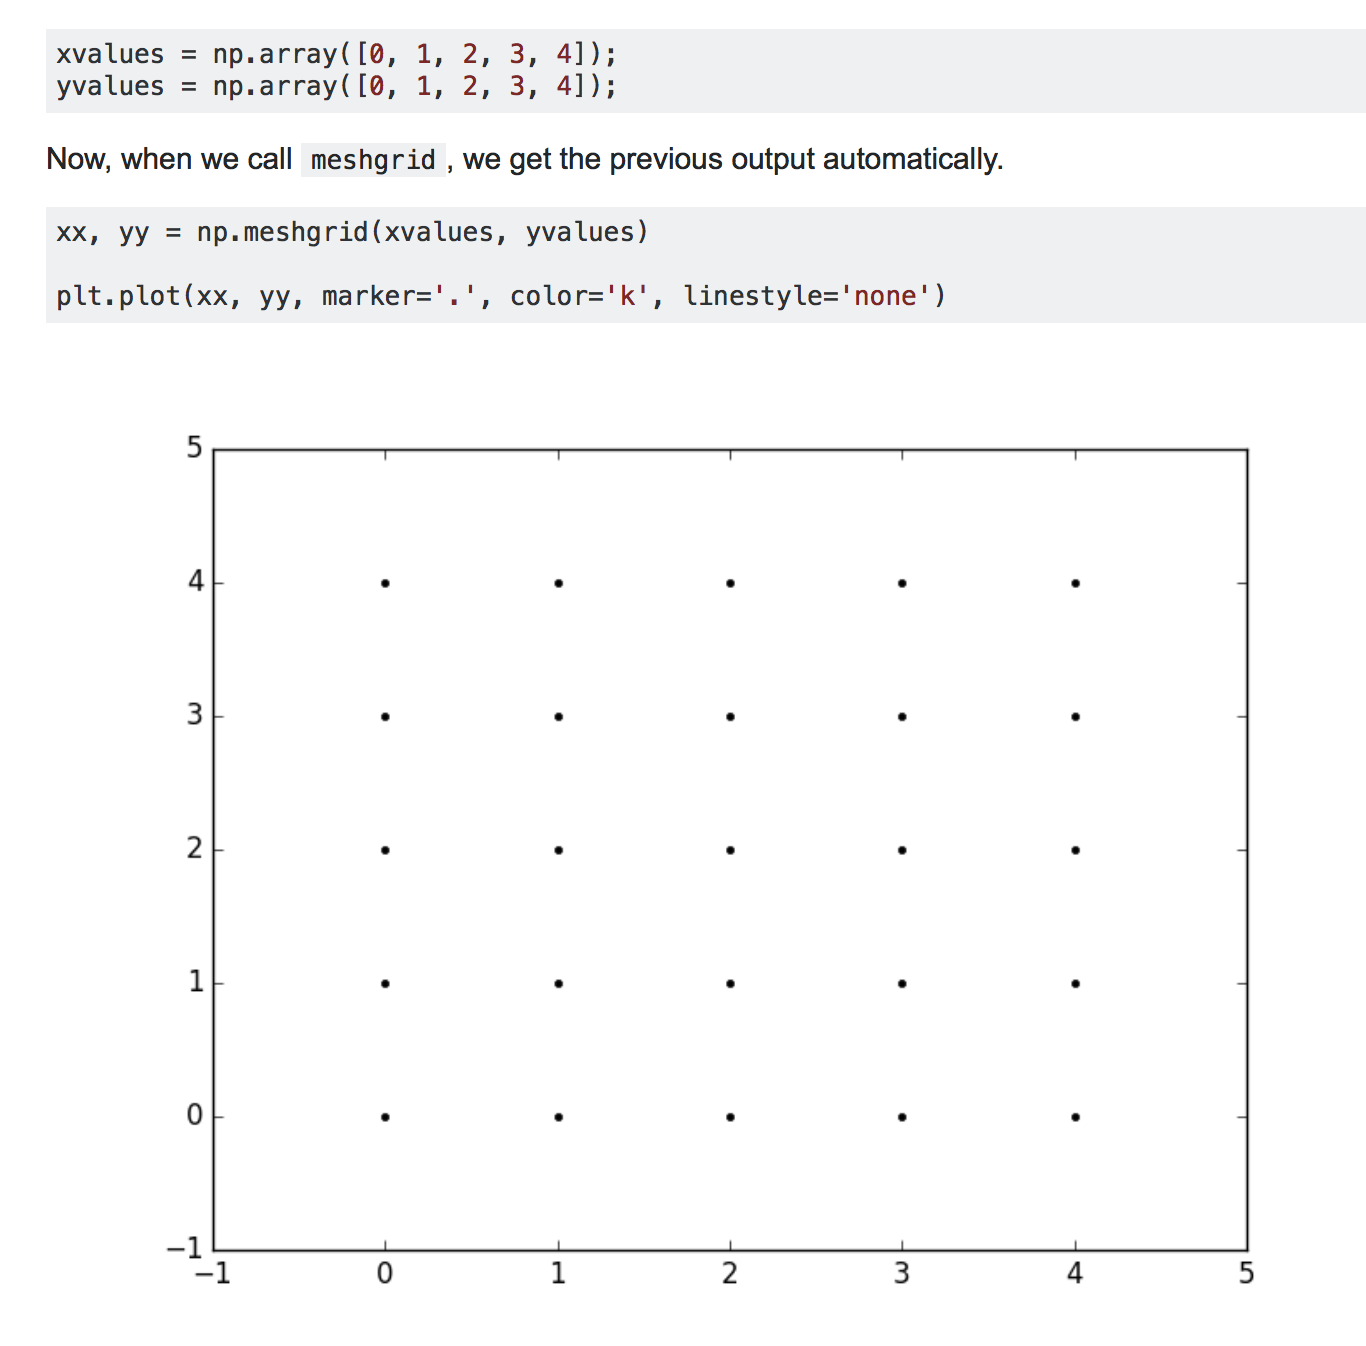
<br>
<br>
> - now xx, yy contains these matrices 
<br>
<br>
> - we do **xx.ravel()** to flatten the 2 day array into a 1D array
<br>
<br>
> - **BASICALLY, WE'RE TRYING TO PLOT THE PREDICTIONS OVER ALL OF THE GRID POINTS AS RETURNED BY XX AND YY.** SO FOR EVERY xx[i][j] , yy[i][j], EXISTS 1 POINT ON THE GRID. THIS POINT IS OF THE FORM (FEATURE1, FEATURE2) AND FORMS THE X INPUT FOR CLASSIFIER WHICH GIVES PREDICTIONS
<br>
<br>
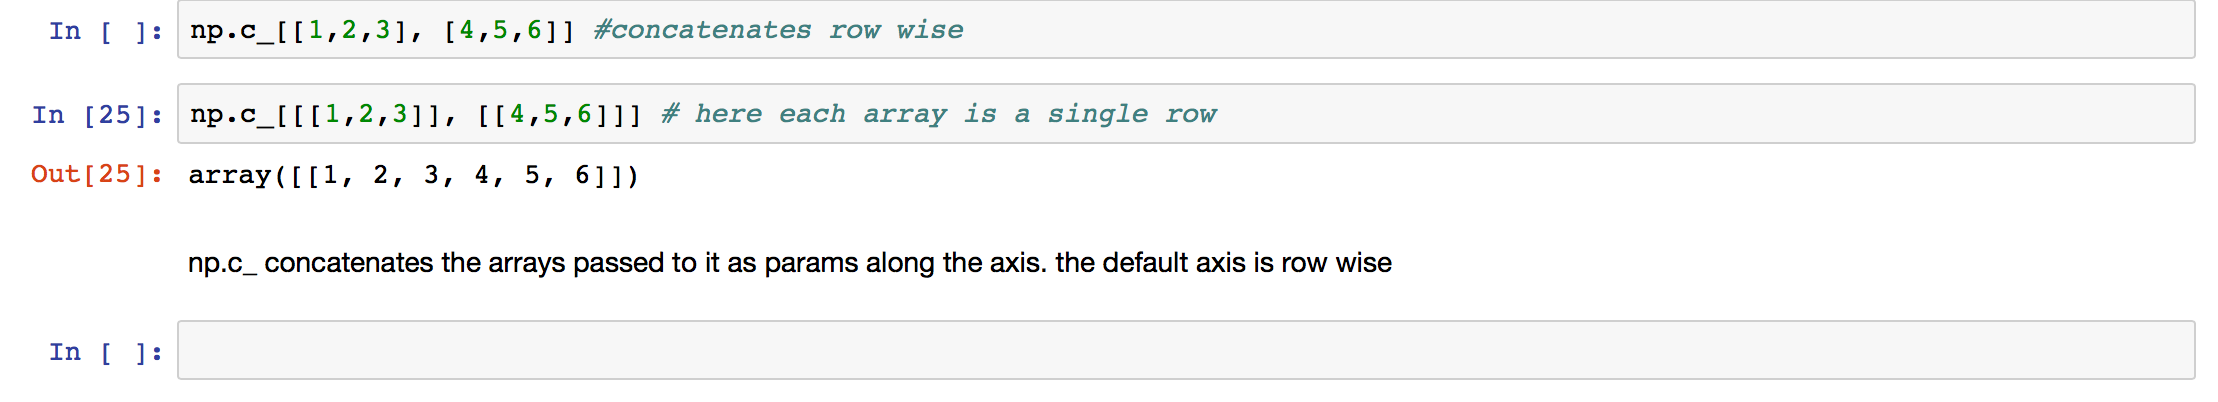
> - **np.c_[xx.ravel(), yy.ravel()]** returns 2 D array of length=total number of points on the grid and each element of size 2- corresponding to the 2 features.
<br>
<br>
> - we merely plot the predictions on the graph
<br>
<br>
> - there are 3 output classes of the iris flowers hence we get 3 regions of colours. 